# McCulloch-Pitts Neuron Triangle Detection with Vectorization and Visualiation





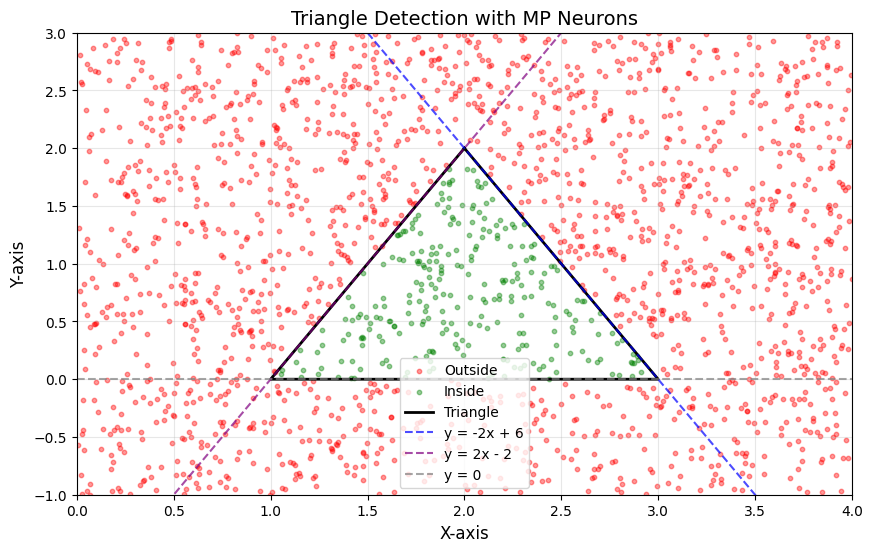


Validation Results:
Point (2, 1): 1 | Expected: 1 ✅ PASS
Point (3, 0): 1 | Expected: 1 ✅ PASS
Point (2.5, 1): 1 | Expected: 0 ❌ FAIL
Point (1, 0): 1 | Expected: 1 ✅ PASS
Point (0, 0): 0 | Expected: 0 ✅ PASS


In [6]:
import numpy as np
import matplotlib.pyplot as plt

class McCullochPittsNeuron:
    """A simple McCulloch-Pitts neuron with different activation functions."""

    def __init__(self, weights, threshold, activation='step'):
        self.weights = np.array(weights)  # Connection weights
        self.threshold = threshold        # Activation threshold
        self.activation = activation      # Activation type

    def predict(self, x):
        """Predicts output for input x (supports both single points and batches)"""
        # Ensure input is 2D for consistent processing
        x = np.atleast_2d(x)
        if x.shape[0] != len(self.weights):
            x = x.T  # Transpose if needed

        net = np.dot(self.weights, x)

        # Apply activation function
        if self.activation == 'step':
            result = (net >= self.threshold).astype(int)
        elif self.activation == 'sign':
            result = np.where(net >= self.threshold, 1, -1)
        else:
            result = (net >= self.threshold).astype(int)

        return result.squeeze()

# Triangle vertices (A, B, C)
A = (2, 2)
B = (3, 0)
C = (1, 0)

# Create neurons with proper dimension handling
neuron_base = McCullochPittsNeuron(weights=[0, 1], threshold=0)
neuron_left = McCullochPittsNeuron(weights=[-2, -1], threshold=-6)
neuron_right = McCullochPittsNeuron(weights=[2, -1], threshold=2)
neuron_and = McCullochPittsNeuron(weights=[1, 1, 1], threshold=2.5)

# Generate random points
num_points = 2000
x_points = np.random.uniform(0, 4, num_points)
y_points = np.random.uniform(-1, 3, num_points)
points = np.vstack([x_points, y_points])

# Classify points
base_cond = neuron_base.predict(points)
left_cond = neuron_left.predict(points)
right_cond = neuron_right.predict(points)

# Fix: Properly stack conditions as (3, N) array
combined_cond = np.vstack([base_cond, left_cond, right_cond])
final_output = neuron_and.predict(combined_cond)

# Separate points
inside_mask = final_output == 1
inside_x, inside_y = x_points[inside_mask], y_points[inside_mask]
outside_x, outside_y = x_points[~inside_mask], y_points[~inside_mask]

# Plotting (unchanged)
plt.figure(figsize=(10, 6))
plt.scatter(outside_x, outside_y, color='red', alpha=0.4, s=10, label='Outside')
plt.scatter(inside_x, inside_y, color='green', alpha=0.4, s=10, label='Inside')
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'black', linewidth=2, label='Triangle')
x_vals = np.linspace(0, 4, 100)
plt.plot(x_vals, -2*x_vals + 6, '--', color='blue', alpha=0.7, label='y = -2x + 6')
plt.plot(x_vals, 2*x_vals - 2, '--', color='purple', alpha=0.7, label='y = 2x - 2')
plt.axhline(0, color='gray', linestyle='--', alpha=0.7, label='y = 0')
plt.title("Triangle Detection with MP Neurons", fontsize=14)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Fixed validation tests
test_points = [
    ((2, 1), 1),    # Inside
    ((3, 0), 1),    # Vertex B
    ((2.5, 1), 0),  # Outside
    ((1, 0), 1),    # Vertex C
    ((0, 0), 0)     # Outside
]

print("\nValidation Results:")
for (x, y), expected in test_points:
    # Create input with proper shape (2, 1)
    point = np.array([[x], [y]])

    # Get predictions
    base = neuron_base.predict(point)
    left = neuron_left.predict(point)
    right = neuron_right.predict(point)

    #  Combine as (3, 1) array instead of nested lists
    combined = np.array([base, left, right])
    result = neuron_and.predict(combined)

    status = "✅ PASS" if result == expected else "❌ FAIL"
    print(f"Point ({x}, {y}): {result} | Expected: {expected} {status}")

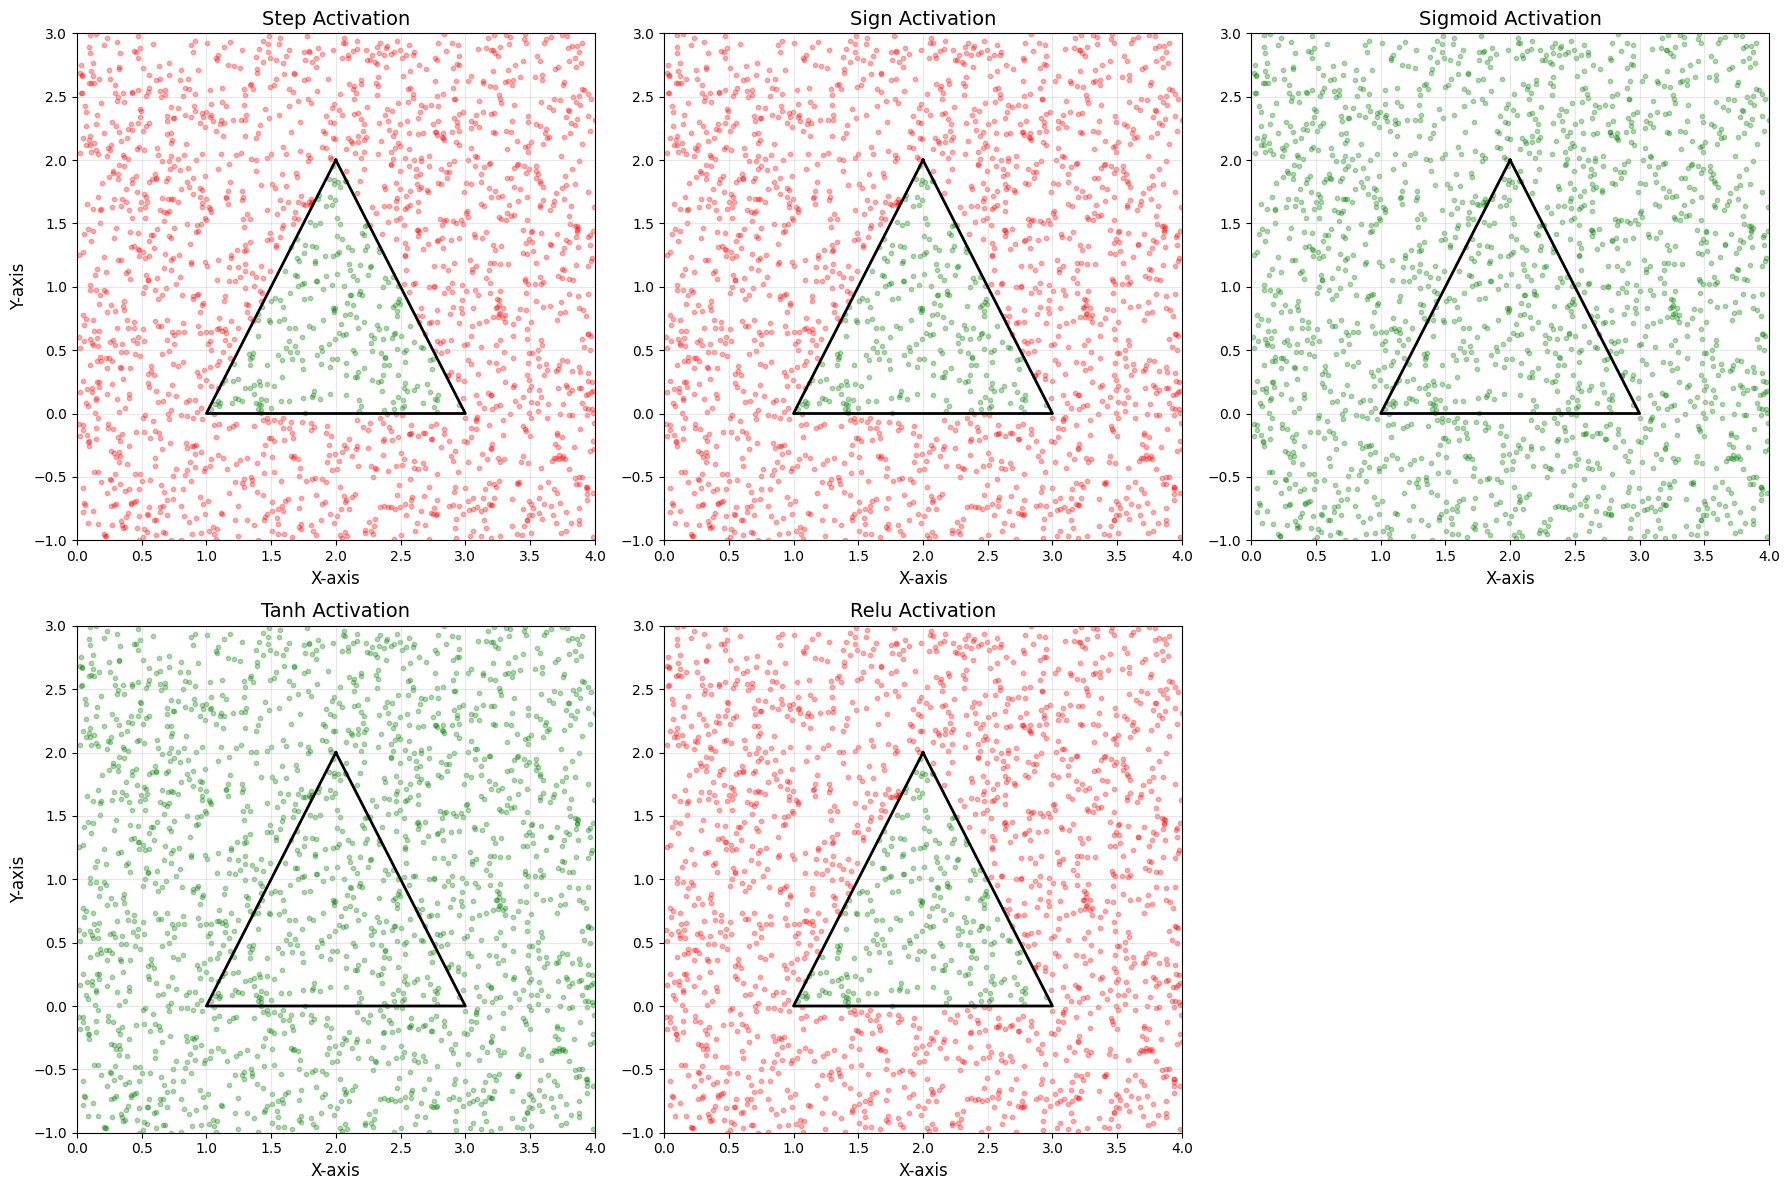

Classification Summary:
STEP    : Inside points -  253 | Match with STEP: 100.0%
SIGN    : Inside points -  253 | Match with STEP: 100.0%
SIGMOID : Inside points - 2000 | Match with STEP: 12.7%
TANH    : Inside points - 2000 | Match with STEP: 12.7%
RELU    : Inside points -  253 | Match with STEP: 100.0%

Validation Results:
Point (2,1):
  STEP: ✅ | SIGN: ✅ | SIGMOID: ✅ | TANH: ✅ | RELU: ✅
Point (3,0):
  STEP: ✅ | SIGN: ✅ | SIGMOID: ✅ | TANH: ✅ | RELU: ✅
Point (2.5,1):
  STEP: ❌ | SIGN: ❌ | SIGMOID: ❌ | TANH: ❌ | RELU: ❌
Point (1,0):
  STEP: ✅ | SIGN: ✅ | SIGMOID: ✅ | TANH: ✅ | RELU: ✅
Point (0,0):
  STEP: ✅ | SIGN: ✅ | SIGMOID: ❌ | TANH: ❌ | RELU: ✅


In [7]:
import numpy as np
import matplotlib.pyplot as plt

class McCullochPittsNeuron:
    """Neuron with extended activation function support"""

    def __init__(self, weights, threshold, activation='step'):
        self.weights = np.array(weights)
        self.threshold = threshold
        self.activation = activation  # Options: step, sign, sigmoid, tanh, relu

    def predict(self, x):
        """Predict with various activation functions"""
        x = np.atleast_2d(x)
        if x.shape[0] != len(self.weights):
            x = x.T

        net = np.dot(self.weights, x)

        if self.activation == 'step':
            res = (net >= self.threshold).astype(int)
        elif self.activation == 'sign':
            res = np.where(net >= self.threshold, 1, -1)
        elif self.activation == 'sigmoid':
            res = 1 / (1 + np.exp(-net))
        elif self.activation == 'tanh':
            res = np.tanh(net)
        elif self.activation == 'relu':
            res = np.maximum(0, net)
        else:
            res = (net >= self.threshold).astype(int)

        return res.squeeze()

# Configuration
VERTICES = [(2, 2), (3, 0), (1, 0)]
ACTIVATIONS = ['step', 'sign', 'sigmoid', 'tanh', 'relu']

# Generate points
np.random.seed(42)
x = np.random.uniform(0, 4, 2000)
y = np.random.uniform(-1, 3, 2000)
points = np.vstack([x, y])

# Boundary condition neurons (always use step)
base_neuron = McCullochPittsNeuron([0, 1], 0)
left_neuron = McCullochPittsNeuron([-2, -1], -6)
right_neuron = McCullochPittsNeuron([2, -1], 2)

# Get boundary conditions
base_cond = base_neuron.predict(points)
left_cond = left_neuron.predict(points)
right_cond = right_neuron.predict(points)
combined = np.vstack([base_cond, left_cond, right_cond])

# Create final decision neurons with different activations
final_neurons = {
    act: McCullochPittsNeuron([1, 1, 1], 2.5, act)
    for act in ACTIVATIONS
}

# Calculate and process outputs
results = {}
for act_name, neuron in final_neurons.items():
    raw = neuron.predict(combined)

    # Convert to binary (0/1) for comparison
    if act_name in ['step', 'sign']:
        results[act_name] = (raw >= 1).astype(int) if act_name == 'step' else (raw == 1).astype(int)
    elif act_name == 'sigmoid':
        results[act_name] = (raw >= 0.5).astype(int)
    elif act_name == 'tanh':
        results[act_name] = (raw >= 0).astype(int)
    elif act_name == 'relu':
        results[act_name] = (raw >= 2.5).astype(int)

# Visualization
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.ravel()

for idx, (act_name, binary_output) in enumerate(results.items()):
    ax = axs[idx]
    ax.scatter(x[binary_output == 0], y[binary_output == 0],
               color='red', alpha=0.3, s=10, label='Outside')
    ax.scatter(x[binary_output == 1], y[binary_output == 1],
               color='green', alpha=0.3, s=10, label='Inside')
    ax.plot(*zip(*VERTICES, VERTICES[0]), 'black', lw=2)
    ax.set_title(f'{act_name.capitalize()} Activation', fontsize=14)
    ax.set_xlim(0, 4)
    ax.set_ylim(-1, 3)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X-axis', fontsize=12)
    if idx % 3 == 0:
        ax.set_ylabel('Y-axis', fontsize=12)

plt.delaxes(axs[5])  # Remove empty subplot
plt.tight_layout()
plt.show()

# Quantitative comparison
print("Classification Summary:")
for act_name, output in results.items():
    print(f"{act_name.upper():<8}: Inside points - {output.sum():>4} | Match with STEP: {(output == results['step']).mean():.1%}")

# Validation tests
TEST_POINTS = [
    ((2, 1), 1),    # Inside
    ((3, 0), 1),    # Vertex
    ((2.5, 1), 0),  # Outside
    ((1, 0), 1),    # Vertex
    ((0, 0), 0)     # Outside
]

print("\nValidation Results:")
for (x_test, y_test), expected in TEST_POINTS:
    point = np.array([[x_test], [y_test]])
    base = base_neuron.predict(point)
    left = left_neuron.predict(point)
    right = right_neuron.predict(point)
    conds = np.array([base, left, right])

    statuses = {}
    for act_name, neuron in final_neurons.items():
        raw = neuron.predict(conds)
        if act_name in ['step', 'sign']:
            res = int(raw >= 1) if act_name == 'step' else int(raw == 1)
        elif act_name == 'sigmoid':
            res = int(raw >= 0.5)
        elif act_name == 'tanh':
            res = int(raw >= 0)
        elif act_name == 'relu':
            res = int(raw >= 2.5)
        statuses[act_name] = '✅' if res == expected else '❌'

    print(f"Point ({x_test},{y_test}):")
    print("  " + " | ".join([f"{k.upper()}: {v}" for k, v in statuses.items()]))